In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
import keras

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
data_dir = '/content/drive/MyDrive/BubbleSort.rar (Unzipped Files)/X-ray Explossion and Normal class'

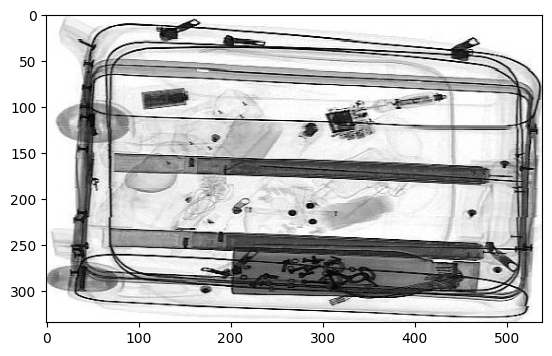

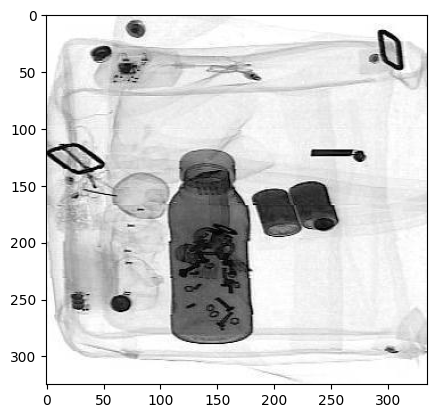

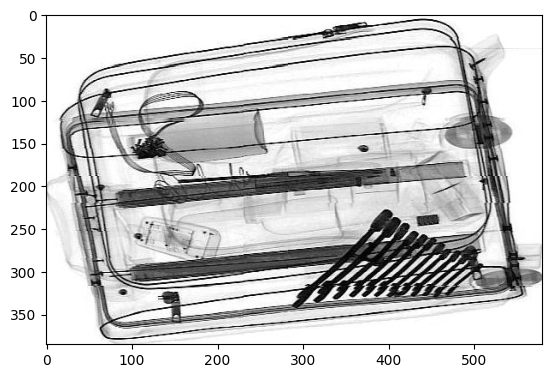

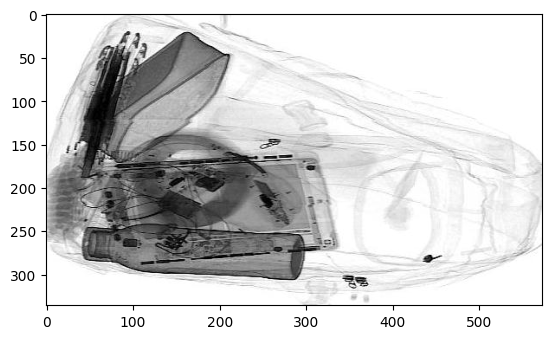

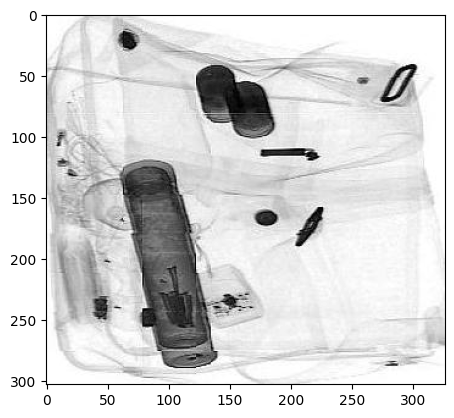

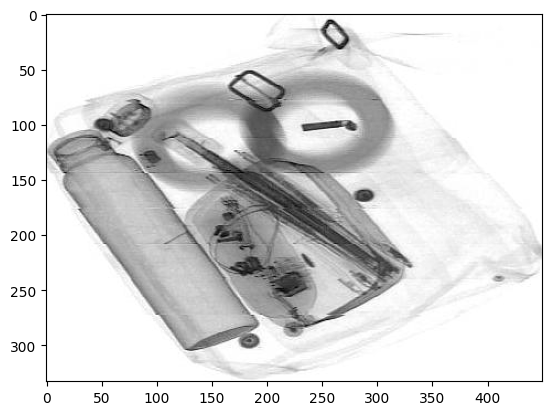

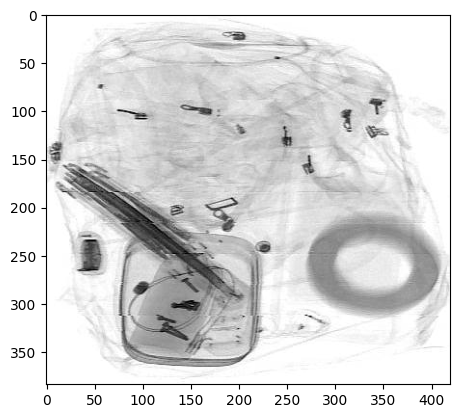

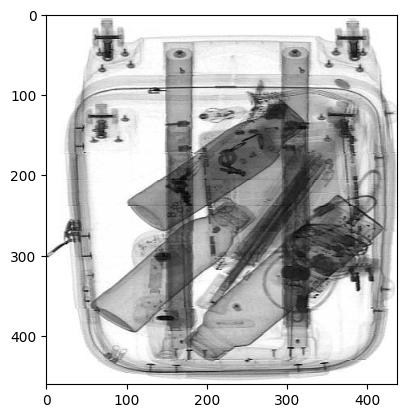

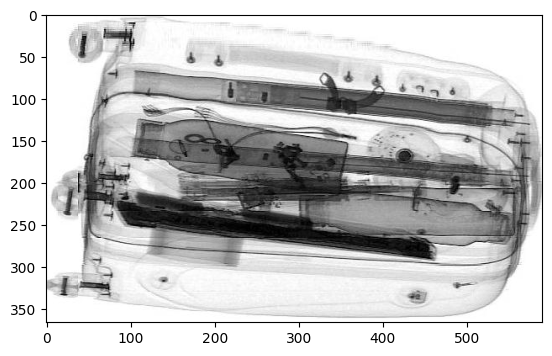

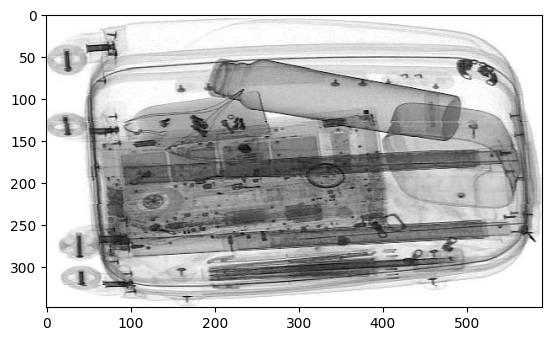

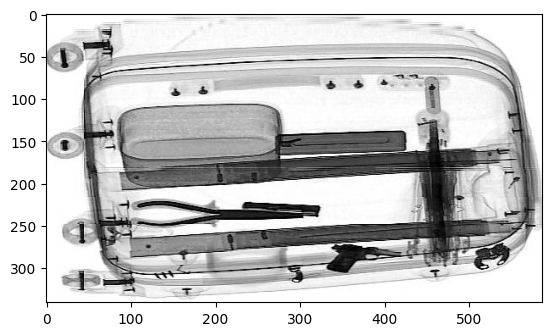

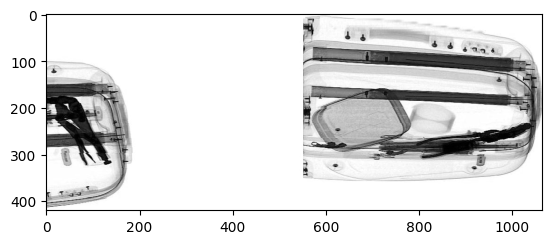

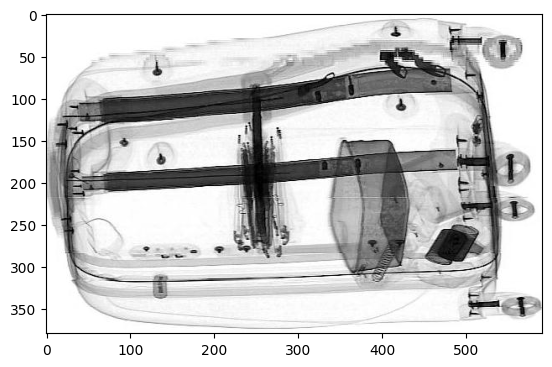

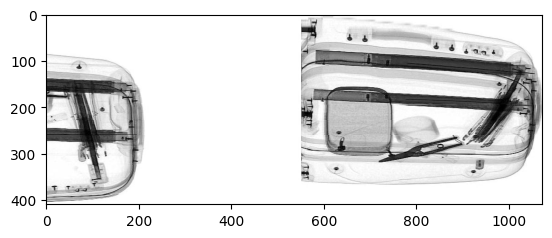

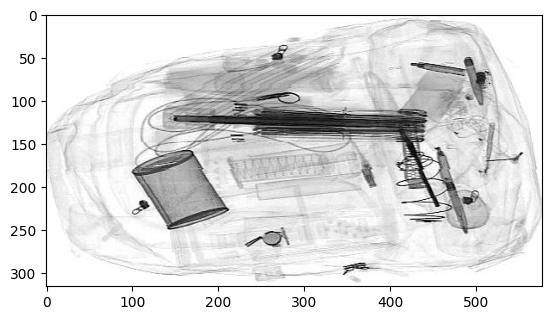

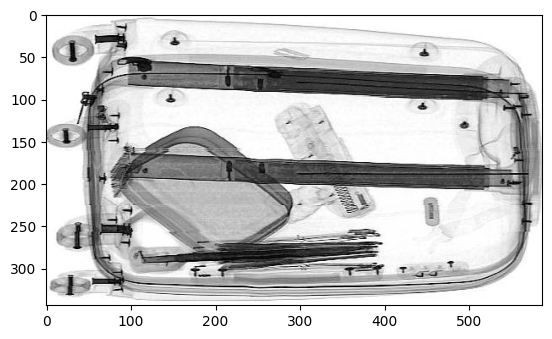

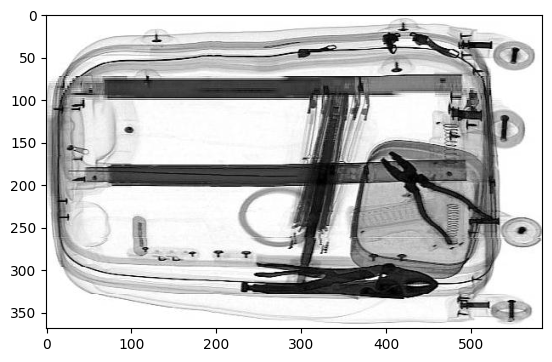

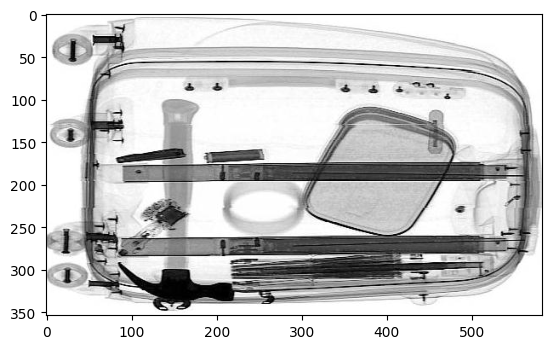

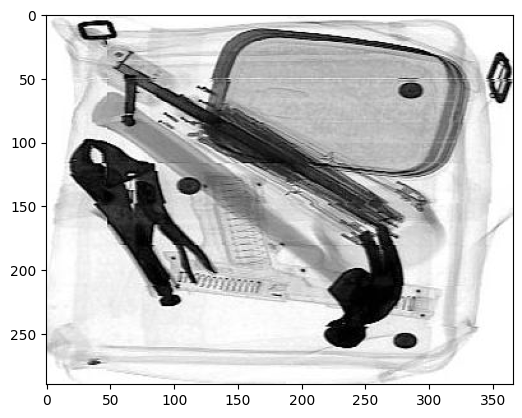

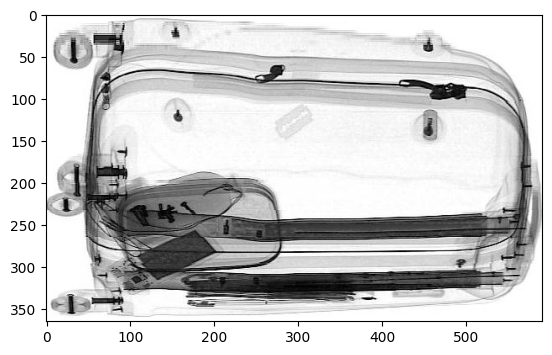

In [18]:
categories = [' X-Ray Data Explosion class','X-Ray Data Normal Class']

for category in categories:
  path = os.path.join(data_dir, category)
  x=0
  for img in os.listdir(path):
    x+=1
    img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_arr, cmap='gray')
    plt.show()
    if x==10:
      break


In [19]:
print(img_arr)
print(img_arr.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(365, 591)


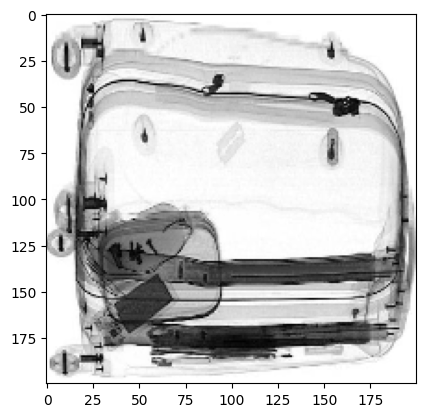

In [20]:
img_size = 200
new_arr = cv2.resize(img_arr,(img_size, img_size))
plt.imshow(new_arr, cmap='gray')
plt.show()

In [21]:
traning_data=[]
def create_traning_data():
  for category in categories:

    path= os.path.join(data_dir, category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(img_arr, (img_size, img_size))
        traning_data.append([new_arr, class_num])
      except Exception as e :
        pass


create_traning_data()
print(len(traning_data))

100%|██████████| 671/671 [00:05<00:00, 120.43it/s]

1216


In [22]:
traning_data[5]

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 0]

In [23]:
import random
random.shuffle(traning_data)
for sample in traning_data[:10]:
  print(sample[1])

1
0
1
0
1
0
0
0
1
1


In [24]:
x= []
y= []

for features, label in traning_data:
  x.append(features)
  y.append(label)

print(x[0].reshape(-1, img_size, img_size , 1))

x = np.array(x).reshape(-1, img_size, img_size)


[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [25]:
from keras.utils import to_categorical

y = to_categorical(y, num_classes=2)  # 2 classes

In [26]:
# Split data into training, testing, and validation sets
from sklearn.model_selection import train_test_split

# Split into training and remaining data (70% for training)
x_train, x_rem, y_train, y_rem = train_test_split(x, y, test_size=0.3, random_state=42)

# Split remaining data into testing (20%) and validation (10%)
test_size = 0.2  # 20% for testing
val_size = 0.1  # 10% for validation
x_test, x_val, y_test, y_val = train_test_split(x_rem, y_rem, test_size=test_size, random_state=42, stratify=y_rem)


In [27]:
print(f"Training set size: {len(x_train)}")
print(f"Testing set size: {len(x_test)}")
print(f"Validation set size: {len(x_val)}")

Training set size: 851
Testing set size: 292
Validation set size: 73


## cnn model

In [ ]:
# Build the CNN model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history= model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/30
27/27 [==============================] - 7s 65ms/step - loss: 524.6905 - accuracy: 0.5311 - val_loss: 0.6190 - val_accuracy: 0.6712
Epoch 2/30
27/27 [==============================] - 1s 29ms/step - loss: 0.5298 - accuracy: 0.8096 - val_loss: 0.6547 - val_accuracy: 0.7397
Epoch 3/30
27/27 [==============================] - 1s 31ms/step - loss: 0.3511 - accuracy: 0.9177 - val_loss: 0.7054 - val_accuracy: 0.7123
Epoch 4/30
27/27 [==============================] - 1s 29ms/step - loss: 0.2112 - accuracy: 0.9553 - val_loss: 1.0058 - val_accuracy: 0.6712
Epoch 5/30
27/27 [==============================] - 1s 30ms/step - loss: 0.1014 - accuracy: 0.9847 - val_loss: 1.3096 - val_accuracy: 0.6575
Epoch 6/30
27/27 [==============================] - 1s 28ms/step - loss: 0.0406 - accuracy: 0.9918 - val_loss: 1.9611 - val_accuracy: 0.6575
Epoch 7/30
27/27 [==============================] - 1s 28ms/step - loss: 0.0276 - accuracy: 0.9941 - val_loss: 1.6075 - val_accuracy: 0.6986
Epoch 8/30


In [ ]:
prediction = model.predict(x_test)
prediction

10/10 [==============================] - 0s 27ms/step


array([[2.74285781e-12, 1.00000000e+00],
       [9.99998689e-01, 1.26922748e-06],
       [9.93082166e-01, 6.91778865e-03],
       [1.00000000e+00, 3.08739579e-13],
       [9.07056068e-19, 1.00000000e+00],
       [8.96220760e-14, 1.00000000e+00],
       [1.00000000e+00, 7.87176366e-11],
       [9.99999881e-01, 1.58088241e-07],
       [1.00000000e+00, 1.13334915e-08],
       [9.99999404e-01, 5.69859537e-07],
       [9.99341786e-01, 6.58232777e-04],
       [8.66488647e-03, 9.91335094e-01],
       [1.76319942e-01, 8.23680043e-01],
       [9.99999762e-01, 2.72483817e-07],
       [1.00000000e+00, 1.02757469e-10],
       [3.77303841e-23, 1.00000000e+00],
       [1.80240109e-04, 9.99819815e-01],
       [9.99888301e-01, 1.11659050e-04],
       [1.00000000e+00, 1.83879612e-09],
       [4.02492839e-12, 1.00000000e+00],
       [9.29502130e-01, 7.04978257e-02],
       [1.00000000e+00, 3.61719152e-15],
       [1.63085204e-07, 9.99999881e-01],
       [8.87578309e-01, 1.12421744e-01],
       [1.234012

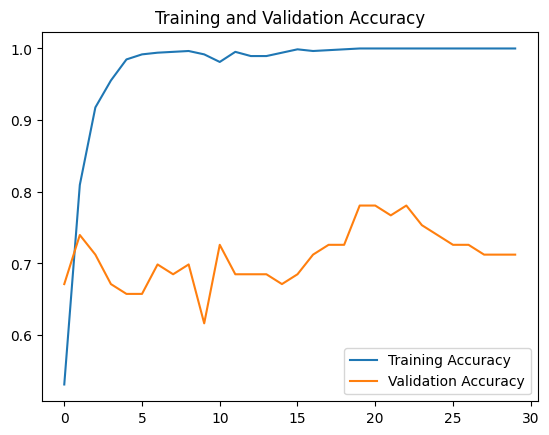

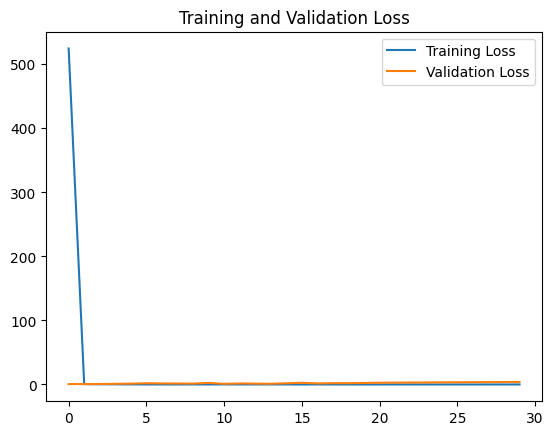

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# resnet Model

In [14]:
# Function to load and preprocess images
from keras.applications import ResNet50
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

def load_and_preprocess_data(data_dir, categories, img_size):
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        for img_name in tqdm(os.listdir(path)):
            try:
                img_path = os.path.join(path, img_name)
                # Read image and convert to RGB format
                img_arr = cv2.imread(img_path)
                img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                # Resize image
                img_arr_resized = cv2.resize(img_arr_rgb, (img_size, img_size))
                # Append image and label to lists
                data.append(img_arr_resized)
                labels.append(categories.index(category))
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
    return np.array(data), to_categorical(labels, num_classes=len(categories))

# Load and preprocess data
img_size = 224  # ResNet50 input size
x, y = load_and_preprocess_data(data_dir, categories, img_size)

# Split data into training, testing, and validation sets
x_train, x_rem, y_train, y_rem = train_test_split(x, y, test_size=0.3, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_rem, y_rem, test_size=0.2, random_state=42)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(categories), activation='softmax')(x)

# Final model
model_resnet = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


100%|██████████| 671/671 [00:08<00:00, 81.10it/s]


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
27/27 [==============================] - 190s 7s/step - loss: 0.5231 - accuracy: 0.7814 - val_loss: 0.1770 - val_accuracy: 0.9589
Epoch 2/10
27/27 [==============================] - 183s 7s/step - loss: 0.1800 - accuracy: 0.9354 - val_loss: 0.1751 - val_accuracy: 0.8904
Epoch 3/10
27/27 [==============================] - 177s 7s/step - loss: 0.1146 - accuracy: 0.9530 - val_loss: 0.1097 - val_accuracy: 0.9452
Epoch 4/10
27/27 [==============================] - 169s 6s/step - loss: 0.0805 - accuracy: 0.9788 - val_loss: 0.0920 - val_accuracy: 0.9589
Epoch 5/10
27/27 [==============================] - 178s 7s/step - loss: 0.0666 - accuracy: 0.9753 - val_loss: 0.0793 - val_accuracy: 0.9726
Epoch 6/10
27/27 [==============================] - 184s 7s/step - loss: 0.0416 - accuracy: 0.9882 - val_loss: 0.0861 - val_accuracy: 0.9452
Epoch 7/10
27/27 [==============================] - 175s 6s/step - loss: 0.0297 - accurac

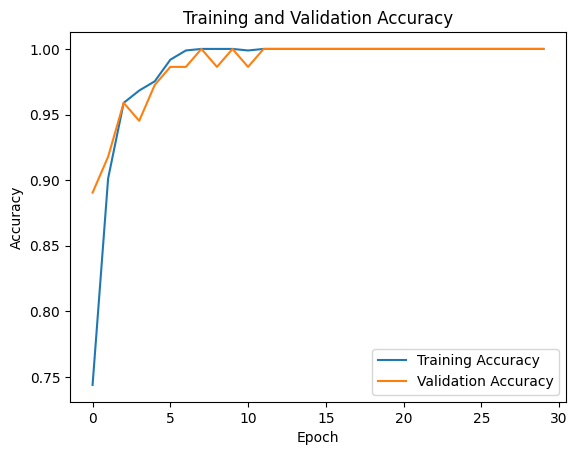

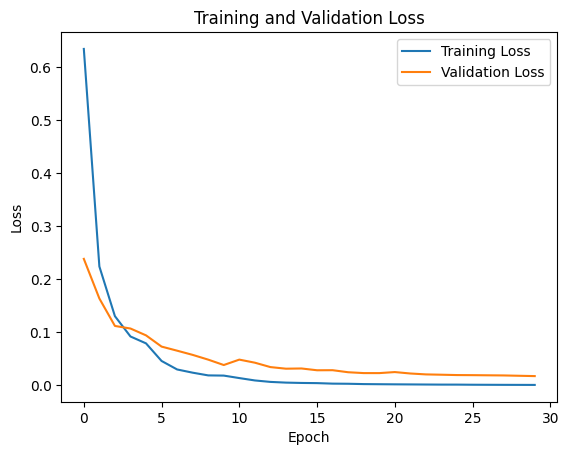

In [ ]:
# Plot training and validation accuracy
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
prediction_resnet = model_resnet.predict(x_test)
prediction_resnet

10/10 [==============================] - 3s 180ms/step


array([[9.99994516e-01, 5.48378011e-06],
       [9.81852293e-01, 1.81477647e-02],
       [9.99999285e-01, 7.72287763e-07],
       [9.96665776e-01, 3.33426124e-03],
       [9.99999046e-01, 9.11460688e-07],
       [2.00764935e-05, 9.99979973e-01],
       [1.00000000e+00, 3.95258537e-09],
       [3.16565121e-08, 1.00000000e+00],
       [1.04718947e-06, 9.99998927e-01],
       [8.76529957e-05, 9.99912381e-01],
       [5.30078658e-04, 9.99469936e-01],
       [2.55459570e-04, 9.99744594e-01],
       [1.24681492e-08, 1.00000000e+00],
       [7.15203569e-05, 9.99928474e-01],
       [9.99990702e-01, 9.28036206e-06],
       [9.99974728e-01, 2.52870796e-05],
       [9.99979615e-01, 2.04382031e-05],
       [9.99998808e-01, 1.13466194e-06],
       [9.99078035e-01, 9.21918312e-04],
       [9.07471462e-04, 9.99092579e-01],
       [4.64930163e-05, 9.99953508e-01],
       [1.00000000e+00, 2.81154078e-09],
       [7.21104071e-03, 9.92788970e-01],
       [2.98017483e-07, 9.99999762e-01],
       [6.077993

# Densenet121

In [32]:
# Function to load and preprocess images
from keras.applications import DenseNet121
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

def load_and_preprocess_data(data_dir, categories, img_size):
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        for img_name in tqdm(os.listdir(path)):
            try:
                img_path = os.path.join(path, img_name)
                # Read image and convert to RGB format
                img_arr = cv2.imread(img_path)
                img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                # Resize image
                img_arr_resized = cv2.resize(img_arr_rgb, (img_size, img_size))
                # Append image and label to lists
                data.append(img_arr_resized)
                labels.append(categories.index(category))
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
    return np.array(data), to_categorical(labels, num_classes=len(categories))

# Load and preprocess data
img_size = 224  # DenseNet121 input size
x, y = load_and_preprocess_data(data_dir, categories, img_size)

# Split data into training, testing, and validation sets
x_train, x_rem, y_train, y_rem = train_test_split(x, y, test_size=0.3, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_rem, y_rem, test_size=0.2, random_state=42)

# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Add custom layers on top of DenseNet121
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(categories), activation='softmax')(x)

# Final model
model_densenet = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_densenet = model_densenet.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


100%|██████████| 671/671 [00:15<00:00, 43.46it/s]


Epoch 1/10
27/27 [==============================] - 171s 6s/step - loss: 1.7186 - accuracy: 0.6228 - val_loss: 0.4228 - val_accuracy: 0.7945
Epoch 2/10
27/27 [==============================] - 150s 6s/step - loss: 0.5000 - accuracy: 0.7991 - val_loss: 0.2624 - val_accuracy: 0.8767
Epoch 3/10
27/27 [==============================] - 151s 6s/step - loss: 0.3266 - accuracy: 0.8660 - val_loss: 0.3239 - val_accuracy: 0.8356
Epoch 4/10
27/27 [==============================] - 157s 6s/step - loss: 0.2966 - accuracy: 0.8778 - val_loss: 0.6743 - val_accuracy: 0.7260
Epoch 5/10
27/27 [==============================] - 163s 6s/step - loss: 0.3453 - accuracy: 0.8731 - val_loss: 0.2161 - val_accuracy: 0.9178
Epoch 6/10
27/27 [==============================] - 169s 6s/step - loss: 0.2041 - accuracy: 0.9224 - val_loss: 0.1925 - val_accuracy: 0.9589
Epoch 7/10
27/27 [==============================] - 162s 6s/step - loss: 0.1889 - accuracy: 0.9283 - val_loss: 0.1904 - val_accuracy: 0.9726
Epoch 8/10
27

In [33]:
# Make predictions
predictions = model_densenet.predict(x_test)
predictions

10/10 [==============================] - 54s 5s/step


array([[9.99600232e-01, 3.99752753e-04],
       [6.71156049e-01, 3.28843921e-01],
       [5.34769893e-01, 4.65230048e-01],
       [8.84146392e-01, 1.15853585e-01],
       [7.58676410e-01, 2.41323620e-01],
       [2.09185723e-02, 9.79081333e-01],
       [9.99534428e-01, 4.65514924e-04],
       [3.81270081e-01, 6.18729949e-01],
       [3.28955217e-03, 9.96710420e-01],
       [4.53773588e-01, 5.46226442e-01],
       [2.01714318e-03, 9.97982800e-01],
       [2.55183520e-04, 9.99744892e-01],
       [5.55026854e-05, 9.99944389e-01],
       [5.80680231e-03, 9.94193077e-01],
       [5.78723073e-01, 4.21276897e-01],
       [9.99246716e-01, 7.53307657e-04],
       [9.25636351e-01, 7.43636861e-02],
       [9.89527881e-01, 1.04721393e-02],
       [9.08816516e-01, 9.11834836e-02],
       [1.10251587e-02, 9.88974810e-01],
       [3.43131982e-02, 9.65686738e-01],
       [9.67304647e-01, 3.26952226e-02],
       [1.46852002e-01, 8.53148103e-01],
       [8.49463628e-04, 9.99150455e-01],
       [1.326936

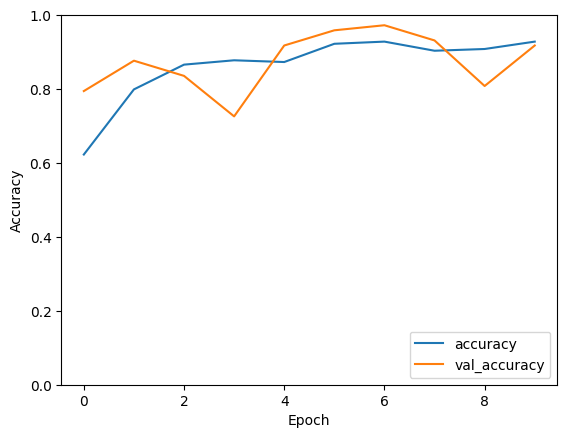

In [34]:
# Plot training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

# Plot training history for DenseNet121 model
plot_history(history_densenet)